In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.1.0     ✔ purrr   0.3.0
✔ tibble  2.0.1     ✔ dplyr   0.8.3
✔ tidyr   0.8.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.3.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [40]:
df <- read_csv('lab_data/businesspractices.csv')

Parsed with column specification:
cols(
  ownerage = col_double(),
  ednyears = col_double(),
  male = col_double(),
  ageoffirm = col_double(),
  ownershours = col_double(),
  country = col_character()
)



In [4]:
head(df)

ownerage,ednyears,male,ageoffirm,ownershours,country
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
43,5,0,14,35,Sri Lanka
45,9,0,8,25,Sri Lanka
43,8,0,13,42,Sri Lanka
41,11,0,6,30,Sri Lanka
42,11,0,6,25,Sri Lanka
27,12,0,4,28,Sri Lanka


In [5]:
summary(df)

    ownerage        ednyears          male          ageoffirm      
 Min.   :19.00   Min.   : 1.00   Min.   :0.0000   Min.   :  0.000  
 1st Qu.:30.00   1st Qu.:10.00   1st Qu.:1.0000   1st Qu.:  2.000  
 Median :36.00   Median :11.00   Median :1.0000   Median :  6.000  
 Mean   :35.39   Mean   :10.91   Mean   :0.9021   Mean   :  8.542  
 3rd Qu.:41.00   3rd Qu.:13.00   3rd Qu.:1.0000   3rd Qu.: 11.000  
 Max.   :83.00   Max.   :25.00   Max.   :1.0000   Max.   :208.000  
  ownershours       country         
 Min.   :  0.00   Length:16377      
 1st Qu.: 40.00   Class :character  
 Median : 56.00   Mode  :character  
 Mean   : 52.85                     
 3rd Qu.: 70.00                     
 Max.   :150.00                     

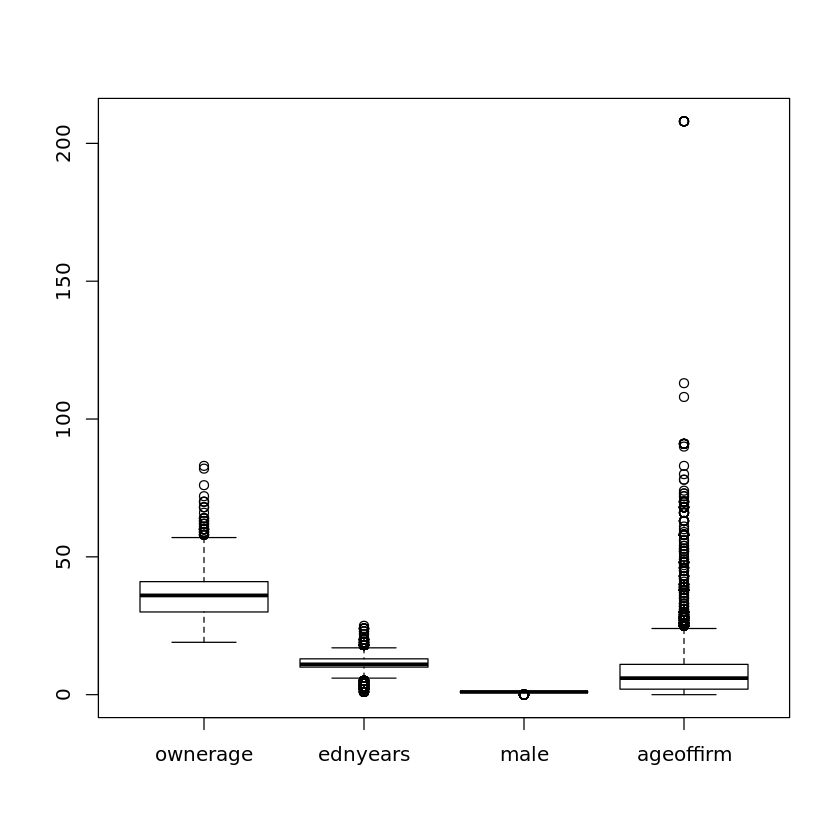

In [6]:
boxplot(df[, 1:4])

In [13]:
my_plots <- lapply(names(df), function(var_x){
  p <- 
    ggplot(df) +
    aes_string(var_x)

  if(is.numeric(df[[var_x]])) {
    p <- p + geom_density()

  } else {
    p <- p + geom_bar()
  } 

})

In [11]:
library(cowplot)


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************




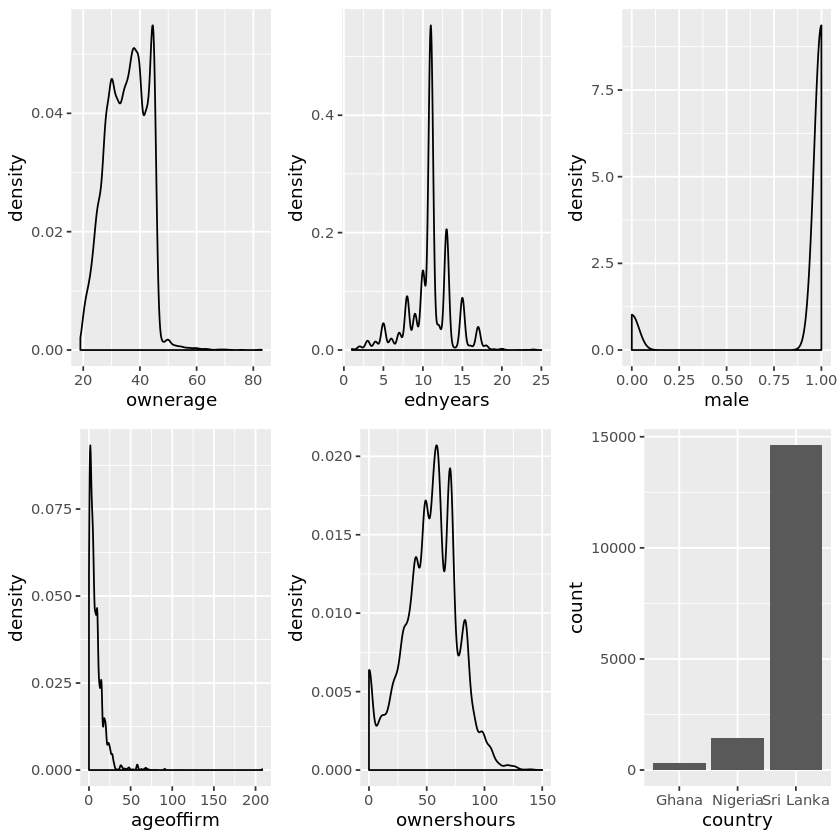

In [14]:
plot_grid(plotlist = my_plots)

In [20]:
hours_worked <- df %>% group_by(country, male) %>% summarise(n = n(), mean_edu = mean(ownershours), se_edu = sd(ownershours)/sqrt(n()), ci_lower = mean_edu - 1.96*se_edu, ci_upper = mean_edu + 1.96 * se_edu)
head(hours_worked)

country,male,n,mean_edu,se_edu,ci_lower,ci_upper
<chr>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Ghana,0,72,50.04167,2.5529171,45.03795,55.04538
Ghana,1,248,46.35887,1.4642527,43.48894,49.22881
Nigeria,0,210,45.43333,1.6076512,42.28234,48.58433
Nigeria,1,1235,51.59109,0.6979053,50.22320,52.95899
Sri Lanka,0,1322,52.10212,0.5914088,50.94296,53.26128
Sri Lanka,1,13290,53.29774,0.2095434,52.88704,53.70845


In [21]:
library(ggplot2)

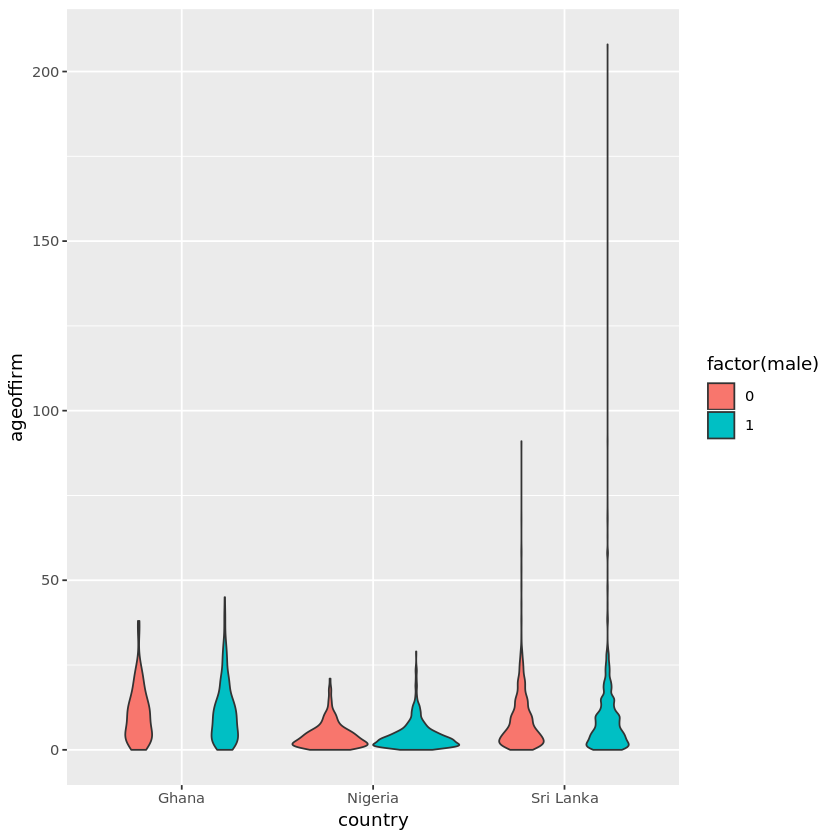

In [22]:
ggplot(df) + geom_violin(aes(x = country, y = ageoffirm, fill = factor(male)))

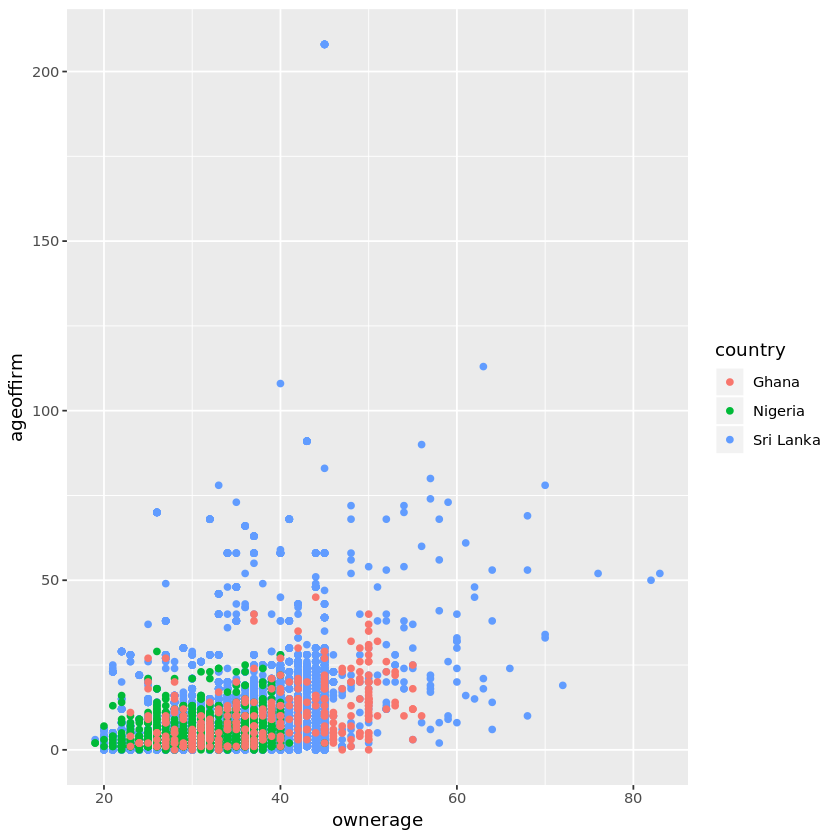

In [33]:
ggplot(df, aes(x = ownerage, y = ageoffirm, colour = country), alpha = 0.2) + layer(geom = "point", stat = "identity", position = "identity") 

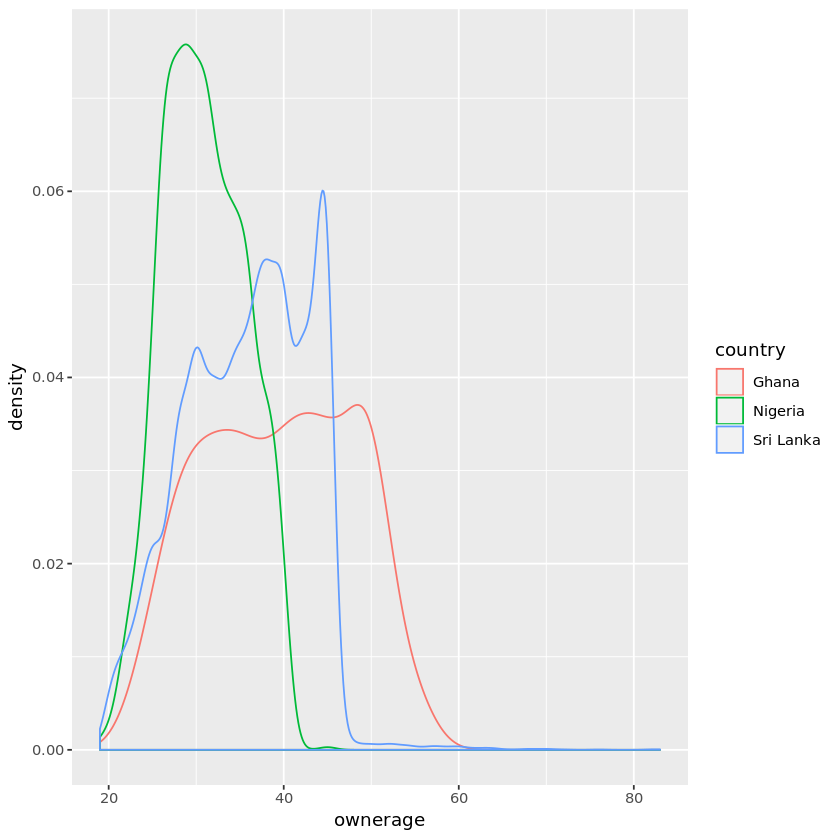

In [34]:
ggplot(df) + geom_density(aes(x = ownerage, colour = country))

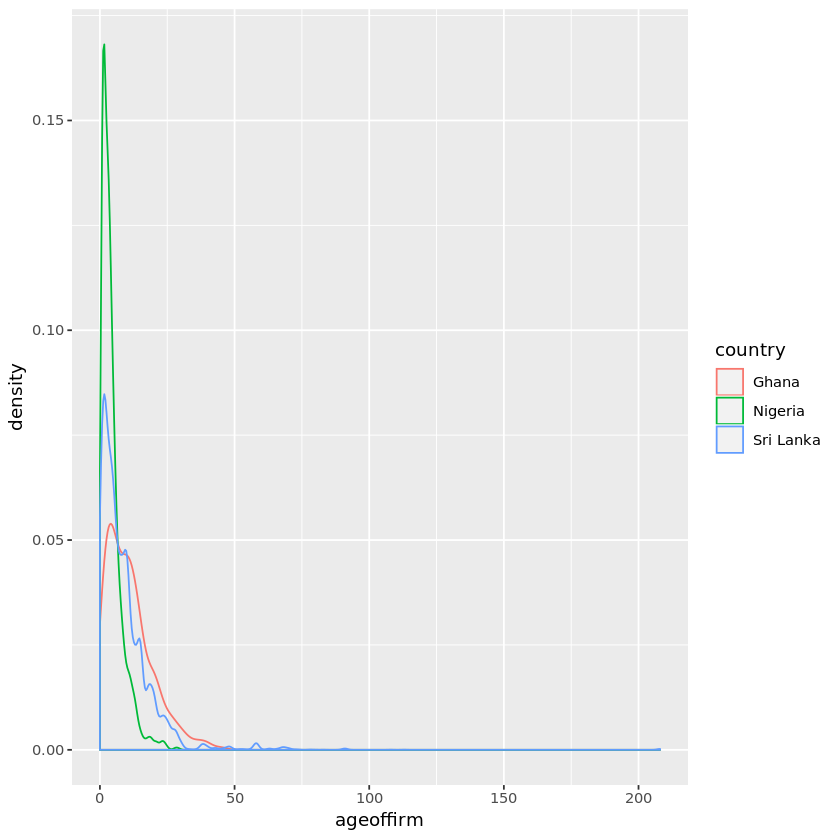

In [36]:
ggplot(df) + geom_density(aes(x = ageoffirm, colour = country))

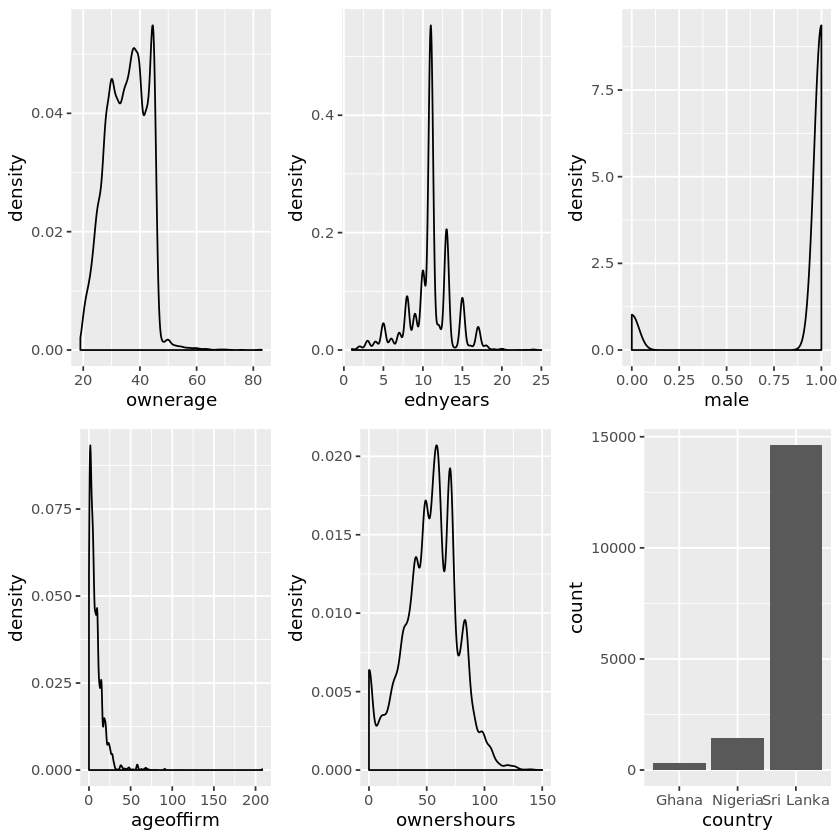

In [39]:
my_plots <- lapply(names(df), function(var_x){
  p <- 
    ggplot(df) +
    aes_string(var_x)

  if(is.numeric(df[[var_x]])) {
    p <- p + geom_density()

  } else if (is.character(df[[var_x]])){
      df[[var_x]] <- factor(df[[var_x]])
      p <- p + geom_bar()
  } else {
    p <- p + geom_bar()
  } 

})

plot_grid(plotlist = my_plots)